# Integração Numérica

Seja $f:[a,b] \to \mathbb{R}$ contínua. A integral de Riemann de $f$ é dada por $$\int_a^b f(x) \, dx = \lim_{n \to \infty} \sum_{i=1}^n f(x_i^*)  \Delta x_i,$$ onde $x_i \in \mathcal{P}$, uma partição de $[a,b]$. A definição anterior não é adequada para fornecer uma regra de quadratura com um bom custo computacional. Assim, apresentaremos algumas regras conhecidas na literatura.

## Regra do Trapézio

Agora, vamos implementar a Regra do Trapézio. Essa regra de quadratura é dada por $$\int_a^b f(x) \, dx \approx \sum_{i=0}^{n-1}\left( \frac{h}{2}\left( f(x_i) + f(x_{i+1}\right)\right).$$

In [7]:
function trapezio(f,a,b,n)
    # Set the partition of [a,b]
    x = range(a,b,length=n+1);
    h = x[2] - x[1];
    s = 0.0;
    for i in 1 : n
        s = s + f(x[i]) + f(x[i+1]);
    end
    return(h * s / 2.0, h); 

end

trapezio (generic function with 1 method)

Vamos considerar a integração abaixo como um exemplo para testar os algoritmos $$\int_0^\pi e^x \cos(x) \, dx = -\frac{(e^\pi + 1 )}{2}.$$

In [8]:
# testando a função trapezio
using Printf;
using Plots;
f(x) = exp(x) * cos(x);
a = 0;
b = π;
n = 2048;
exato = -(exp(π) + 1) / 2;

    2  -17.3892593   1.5707963e+00  5.3189130e+00
    4  -13.3360228   7.8539816e-01  1.2656765e+00
    8  -12.3821624   3.9269908e-01  3.1181611e-01
   16  -12.1480041   1.9634954e-01  7.7657784e-02
   32  -12.0897421   9.8174770e-02  1.9395801e-02
   64  -12.0751941   4.9087385e-02  4.8477828e-03
  128  -12.0715582   2.4543693e-02  1.2118727e-03
  256  -12.0706493   1.2271846e-02  3.0296362e-04
  512  -12.0704221   6.1359232e-03  7.5740619e-05
 1024  -12.0703653   3.0679616e-03  1.8935137e-05
 2048  -12.0703511   1.5339808e-03  4.7337831e-06


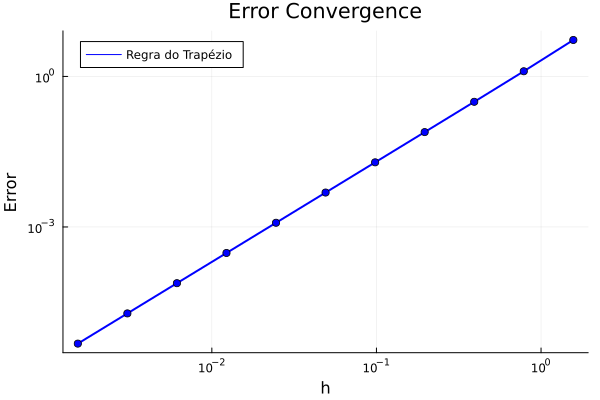

In [9]:
erro_t = Float64[];
hlen = Float64[];
k = 2;
while k <= n
    (s,h)  = trapezio(f,a,b,k);
    push!(hlen,h);
    erro = abs(s-exato);
    push!(erro_t,erro);
    @printf("%5d  %10.7f   %10.7e  %10.7e\n",k,s,h,erro);
    k = 2 * k;
end
plot(hlen,erro_t,title="Error Convergence",label = "Regra do Trapézio",xaxis=:log,yaxis=:log,c=:blue,lw=2,xlabel="h",ylabel="Error");
scatter!(hlen,erro_t,c=:blue,leg=:topleft,label=false)

## Regra de Simpson

A regra de Simpson é dada por $$\int_a^b f(x) \, dx \approx \sum_{i=0}^{\frac{n}{2} - 1}\frac{h}{3} \left( f(x_{2i}) + 4 f(x_{2i+1}) + f(x_{2i+2})\right).$$ Note que $n$ deve ser um inteiro positivo par.

In [10]:
function simpson(f,a,b,n)
    # Set the partition of [a,b]
    x = range(a,b,length = n + 1);
    h = x[2] - x[1];
    s = 0.0;
    for i in 0 : div(n,2) -1
        s = s + f(x[2*i + 1]) + 4 * f(x[2*i + 2]) + f(x[2*i + 3]);
    end
    return(h * s / 3.0, h); 

end

simpson (generic function with 1 method)

    2   -11.59284   1.57080e+00  4.77507e-01
    4   -11.98494   7.85398e-01  8.54023e-02
    8   -12.06421   3.92699e-01  6.13736e-03
   16   -12.06995   1.96350e-01  3.94993e-04
   32   -12.07032   9.81748e-02  2.48603e-05
   64   -12.07034   4.90874e-02  1.55646e-06
  128   -12.07035   2.45437e-02  9.73205e-08
  256   -12.07035   1.22718e-02  6.08320e-09
  512   -12.07035   6.13592e-03  3.80211e-10
 1024   -12.07035   3.06796e-03  2.37605e-11
 2048   -12.07035   1.53398e-03  1.48503e-12


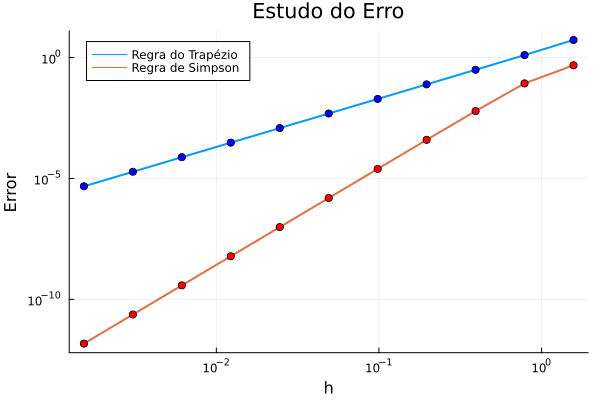

In [11]:
# testando a função simpson
erro_s = Float64[];
#hlen = Float64[];
k = 2;
while k <= n
    (s,h)  = simpson(f,a,b,k);
    #push!(hlen,h);
    erro = abs(s-exato);
    push!(erro_s,erro);
    @printf("%5d  %10.5f   %10.5e  %10.5e\n",k,s,h,erro);
    k = 2 * k;
end
#plot!(hlen,erro_s,label="Regra de Simpson",c=:red,lw=2,xaxis=:log,yaxis=:log,legend=false,xlabel="h",ylabel="Error")
plot(hlen,[erro_t,erro_s],title="Estudo do Erro",label=["Regra do Trapézio" "Regra de Simpson"],lw=2,xaxis=:log,yaxis=:log,xlabel="h",ylabel="Error")
scatter!(hlen,erro_t,c=:blue,legend=:topleft,label=false)
scatter!(hlen,erro_s,c=:red,legend=:topleft,label=false)

Inclinação das retas na figura anterior)

In [12]:
M = [11 sum(log.(hlen));sum(log.(hlen)) sum(log.(hlen).^2)]
b = [sum(log.(erro_t));sum(log.(erro_t) .* log.(hlen))]
s = M \ b
println("A declividade da reta azul é $(s[2])")

A declividade da reta azul é 2.0058055095904748


In [13]:
M = [11 sum(log.(hlen));sum(log.(hlen)) sum(log.(hlen).^2)]
b = [sum(log.(erro_t));sum(log.(erro_t) .* log.(hlen))]
d_t = M \ b
println("A declividade da reta azul é $(d_t[2])")

A declividade da reta azul é 2.0058055095904748


In [14]:
M = [11 sum(log.(hlen));sum(log.(hlen)) sum(log.(hlen).^2)]
b = [sum(log.(erro_s));sum(log.(erro_s) .* log.(hlen))]
s = M \ b
println("A declividade da reta vermelha é $(s[2])")

A declividade da reta vermelha é 3.90824097476406
